In [11]:
# Program to generate exploratory data analysis for data incubator challenge/project

# Import relevant modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

# Merge the data
data_folder=os.path.join(os.getcwd())
turnstile_file='Turnstile_Usage_Data__2018_A.csv'
turnstile_columns=['C/A','Unit','Station','Line Name','Date','Time','Entries','Exits'] # Dont' read all data
subway_location_file='NYC_Transit_Subway_Entrance_And_Exit_Data.csv'
subway_location_columns=['Station Name','Line','Station Latitude','Station Longitude']

# Ok, read data
filename=os.path.join(data_folder,turnstile_file)
#data=pd.read_csv(filename,parse_dates=['Date','Time'],infer_datetime_format=True,usecols=turnstile_columns)
# Is regular reading faster?
data=pd.read_csv(filename,parse_dates=['Date','Time'],infer_datetime_format=True)
filename=os.path.join(data_folder,subway_location_file)
subway_locations=pd.read_csv(filename,usecols=subway_location_columns)
subway_locations=subway_locations.drop_duplicates(['Station Name','Station Latitude','Station Longitude'])
subway_locations=subway_locations.reset_index()
    # Remove duplicates and reset index
subway_locations.loc[:,'Station Name']=subway_locations.loc[:,'Station Name'].str.upper()
    # To match data
    


In [12]:
# Ok, we need to do some cleaning up to get geocodes... use fuzzywuzzy to match strings?
from fuzzywuzzy import fuzz, process

# Now, append latitude and longitude data
for count,value in enumerate(data.Station.unique()):
    extract_best_station=process.extractOne(value,subway_locations['Station Name'])
    
    # Only fill data if it's a good match
    if extract_best_station[1]>90:
        idx=data.Station==value # Find all samples from this station
        idx_sub=subway_locations.loc[:,'Station Name']==extract_best_station[0]
        
        tempval=np.array(subway_locations.loc[idx_sub,'Station Latitude'])
        data.loc[idx,'Latitude']=tempval[0]
        tempval=np.array(subway_locations.loc[idx_sub,'Station Longitude'])
        data.loc[idx,'Longitude']=tempval[0]

Text(0.5, 0, 'Subway Line')

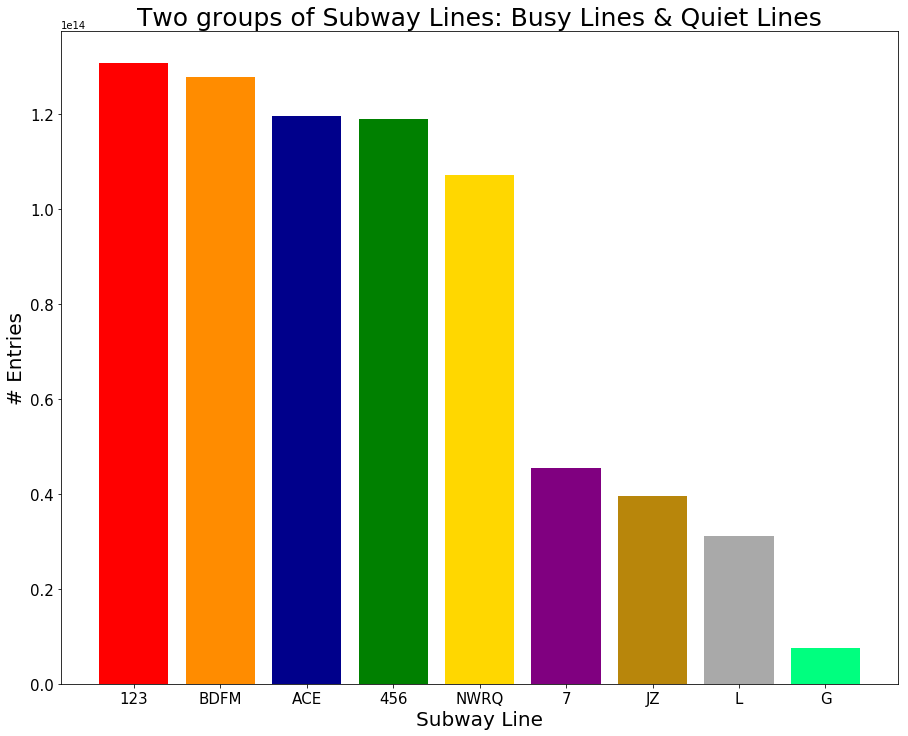

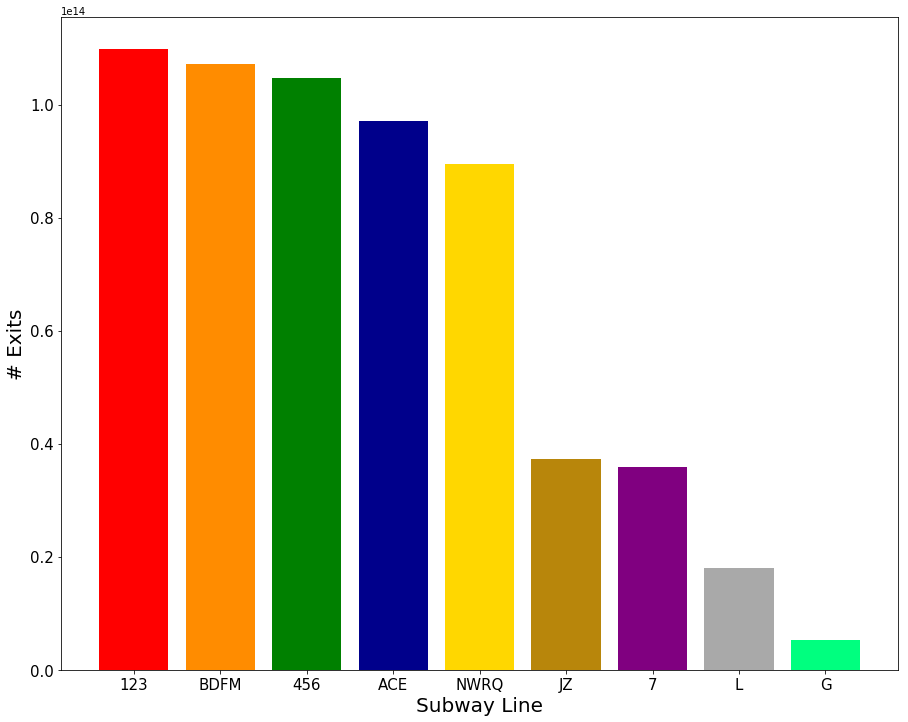

In [20]:
# Ok, now let's group according to line
subway_lines=np.array(['123','456','7','ACE','BDFM','G','JZ','L','NWRQ'])
plotColor=np.array(['red','green','purple','darkblue','darkorange','springgreen','darkgoldenrod','darkgrey','gold'])
nEntries_lines=[]
nExits_lines=[]

for count,value in enumerate(subway_lines):

    for i in range(len(value)):
        tempi=data['Line Name'].str.contains(value[i])
        if i==0:
            idx=tempi
        else:
            idx=idx | tempi
        
    tempval=data.loc[idx,'Entries'].sum()
    nEntries_lines.append(tempval)
    tempval=data.loc[idx,'Exits'].sum()
    nExits_lines.append(tempval)
    

# Now plot
nEntries_lines=np.array(nEntries_lines)
nExits_lines=np.array(nExits_lines)

sorti=np.argsort(nEntries_lines)
sorti=np.flip(sorti)
plt.figure(figsize=(15,12))
ax=plt.subplot()
plt.bar(subway_lines[sorti],nEntries_lines[sorti],width=0.8,color=plotColor[sorti])
plt.ylabel('# Entries', fontsize=20)
plt.title('Two groups of Subway Lines: Busy Lines & Quiet Lines',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Subway Line',fontsize=20)
           
sorti=np.argsort(nExits_lines)
sorti=np.flip(sorti)
plt.figure(figsize=(15,12))
ax=plt.subplot()
plt.bar(subway_lines[sorti],nExits_lines[sorti],width=0.8,color=plotColor[sorti])
plt.ylabel('# Exits', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Subway Line',fontsize=20)